In [28]:
#dependents
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from scipy import stats

#create imporsonment data url
Imprisonment_baseUrl = "https://api.ed.gov/data/mbk-imprisonment?"
Imprisonment_apiKey = "api_key=DTeVODnGRjLME8jd6PQCOy1DpgLqXPdHWtGO4EqA"
Imprisonment_perPage = "per_page=" + "195"
Imprisonment_url = Imprisonment_baseUrl + Imprisonment_apiKey + "&" + Imprisonment_perPage

#request and get data as "ImprisonmentData" through url
ImprisonmentData = requests.get(Imprisonment_url).json()

#get length of imprisonment dataframe entries 
Imprisonment_length = len(ImprisonmentData["resources"])

#initialize lists for data pull from request
YearList = [] 
RaceEthnicityList = []
SexLists = []
CountList = []
CountPerCapitaList = []

#pull all data from requested data and put into lists for each column
for i in range (Imprisonment_length):
    YearList.append(int(ImprisonmentData["resources"][i]["Year"]))
    RaceEthnicityList.append(ImprisonmentData["resources"][i]["Race/ethnicity"])
    SexLists.append(ImprisonmentData["resources"][i]["Sex"])
    CountList.append(int(ImprisonmentData["resources"][i]["Count"]))
    CountPerCapitaList.append(int(ImprisonmentData["resources"][i]["Rate per 100,000"]))

#create dataframe and input all lists
imprisonmentDf = pd.DataFrame({
    "Year" : YearList,
    "Race/Ethnicity" : RaceEthnicityList,
    "Sex" : SexLists,
    "Count" : CountList,
    "Per Capita Rate per 100,000" : CountPerCapitaList
})

#show imprisonment dataframe
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True).head(16)


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,"Black, non-Hispanic",None,104880,2732
104,2000,"Black, non-Hispanic",Male,101521,5358
156,2000,"Black, non-Hispanic",Female,3500,180
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,"Other race, non-Hispanic",None,15350,826
130,2000,"Other race, non-Hispanic",Male,14504,1557
182,2000,"Other race, non-Hispanic",Female,869,94
39,2000,"White, non-Hispanic",None,59129,345


In [12]:
#SEE LIST OF RACES - UNNECESSARY
#initilize race list
raceList = []
#populate race list with unique races
raceList = imprisonmentDf["Race/Ethnicity"].unique()
#show unique races
raceList
imprisonmentDf["Race/Ethnicity"].unique()

array([None, 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other race, non-Hispanic'], dtype=object)

In [13]:
#Pull CSV - Drop Out Data
dropOut_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_year_and_race.csv")
dropOut_df

#Pull CSV - 2000-2007
dropOut_00_07_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_race(2000-2007).csv")
dropOut_00_07_df

#Pull CSV - Drop Out Data
dropOut_08Plus_df = pd.read_csv("../CSVs/Total_drop_out_rates_by_race(2008+).csv")
dropOut_08Plus_df

,Year,Dropout White,Dropout Black,Dropout Hispanic,Dropout other
0,2008,15.6,24.1,33.0,23.90
1,2009,15.4,24.0,31.2,17.25
2,2010,15.5,23.6,30.8,20.05
3,2011,15.9,23.7,28.8,19.85
4,2012,15.8,21.3,26.5,18.30


In [ ]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS
imprisonmentDf_totalImprisonments = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
imprisonmentGraph_totalImprisonments = imprisonmentDf_totalImprisonments.unstack(level=-1).plot(kind="line", legend=False)
imprisonmentGraph_totalImprisonments.set_ylabel("Total Imprisonments")
imprisonmentGraph_totalImprisonments.set_xlabel("Year")
plt.show()

In [ ]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS - PER CAPITA
imprisonmentDf_totalImprisonmentsPerCapita = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Per Capita Rate per 100,000"].sum()/100000*100)
imprisonmentGraph_totalImprisonmentsPerCapita = imprisonmentDf_totalImprisonmentsPerCapita.unstack(level=-1).plot(kind="line", legend=False)
imprisonmentGraph_totalImprisonmentsPerCapita.set_ylabel("Per Capita Rate per 100,000")
imprisonmentGraph_totalImprisonmentsPerCapita.set_xlabel("Year")
#plt.show()

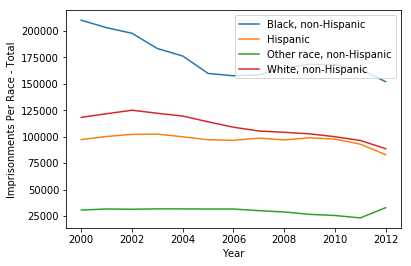

In [14]:
#GRAPH TOTAL IMPRISONMENTS PER RACE
#get imprisonment count per race
#Adds gender counts together into single race count
#unstacks -1 and then stacks 0
imprisonmentDf_perRace_count = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum()).unstack(level=-1).stack(level=0) 
imprisonmentDf_perRace_count.reset_index(level=0, inplace=True)
imprisonmentDf_perRace_count = imprisonmentDf_perRace_count.set_index('Year')
imprisonmentDf_perRace_count = imprisonmentDf_perRace_count.rename_axis("", axis="columns")
imprisonmentDf_perRace_count

#write CSV
imprisonmentDf_perRace_count.to_csv("../CSVs/imprisonmentDf_perRace_count.csv")


#imprisonmentDf_yearSum_test = imprisonmentDf_totalPerRace.unstack(level=-1).plot(kind="line", legend=True)#, xticks=imprisonmentDf_yearSum.index)
#imprisonmentDf_yearSum_test.set_ylabel("Imprisonments Per Race - Total")
#plt.show()
plt.plot(imprisonmentDf_perRace_count.index, imprisonmentDf_perRace_count["Black, non-Hispanic"])
plt.plot(imprisonmentDf_perRace_count.index, imprisonmentDf_perRace_count["Hispanic"])
plt.plot(imprisonmentDf_perRace_count.index, imprisonmentDf_perRace_count["Other race, non-Hispanic"])
plt.plot(imprisonmentDf_perRace_count.index, imprisonmentDf_perRace_count["White, non-Hispanic"])
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race - Total")
plt.legend(labels=imprisonmentDf_perRace_count.columns, loc="best", markerscale=.5)
plt.show()
#imprisonmentDf_perRace_count.columns

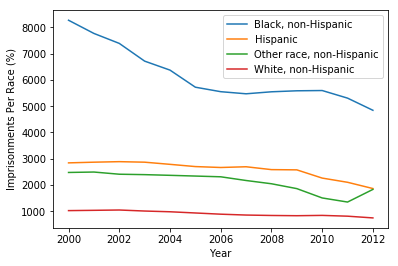

In [15]:
#GRAPH TOTAL IMPRISONMENTS PER RACE PER CAPITA %
#get imprisonment count per race
#Adds gender counts together into single race count
#unstacks -1 and then stacks 0
imprisonmentDf_perRace_perCapita = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Per Capita Rate per 100,000"].sum()).unstack(level=-1).stack(level=0) 
imprisonmentDf_perRace_perCapita.reset_index(level=0, inplace=True)
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita.set_index('Year')
imprisonmentDf_perRace_perCapita = imprisonmentDf_perRace_perCapita.rename_axis("", axis="columns")
imprisonmentDf_perRace_perCapita

#write CSV
imprisonmentDf_perRace_perCapita.to_csv("../CSVs/imprisonmentDf_perRace_perCapita.csv")

#imprisonmentDf_yearSum_test = imprisonmentDf_totalPerRace.unstack(level=-1).plot(kind="line", legend=True)#, xticks=imprisonmentDf_yearSum.index)
#imprisonmentDf_yearSum_test.set_ylabel("Imprisonments Per Race - Total")
#plt.show()
plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["Black, non-Hispanic"])
plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["Hispanic"])
plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["Other race, non-Hispanic"])
plt.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["White, non-Hispanic"])
plt.xlabel("Year")
plt.ylabel("Imprisonments Per Race (%)")
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
plt.show()

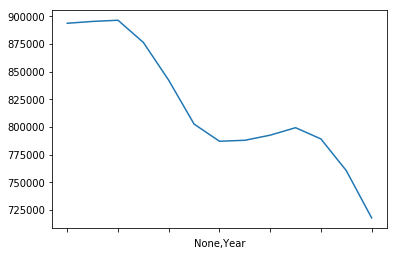

In [16]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS
imprisonmentDf_totalImprisonments = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
imprisonmentDf_totalImprisonments.unstack(level=-1).plot(kind="line", legend=False)
plt.show()

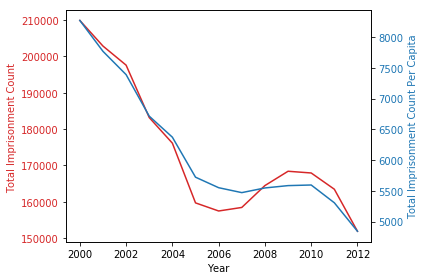

In [17]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Imprisonment Count ', color=color)
ax1.plot(imprisonmentDf_perRace_count.index, imprisonmentDf_perRace_count["Black, non-Hispanic"], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Imprisonment Count Per Capita', color=color)  # we already handled the x-label with ax1
ax2.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["Black, non-Hispanic"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('temp.png')
#plt.show()

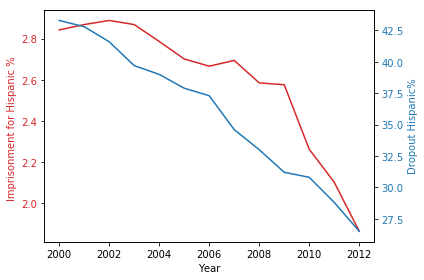

In [23]:
#HISPANIC DATA
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Imprisonment for Hispanic % ', color=color)
ax1.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["Hispanic"]/1000, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Dropout Hispanic%', color=color)  # we already handled the x-label with ax1
ax2.plot(dropOut_df["Year"], dropOut_df["Dropout Hispanic"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('temp.png')
plt.show()

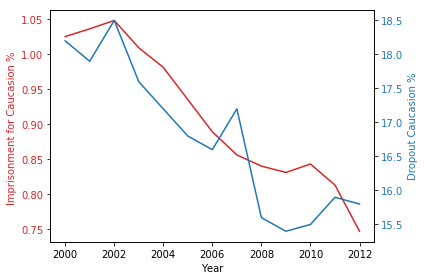

In [21]:
#CAUCASION DATA
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Imprisonment for Caucasion % ', color=color)
ax1.plot(imprisonmentDf_perRace_perCapita.index, imprisonmentDf_perRace_perCapita["White, non-Hispanic"]/1000, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Dropout Caucasion %', color=color)  # we already handled the x-label with ax1
ax2.plot(dropOut_df["Year"], dropOut_df["Dropout White"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('temp.png')
plt.show()

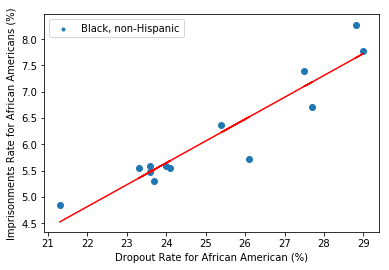

0.8822929257953804


In [42]:
plt.scatter(dropOut_df["Dropout Black"], imprisonmentDf_perRace_perCapita["Black, non-Hispanic"]/1000)

plt.xlabel("Dropout Rate for African American (%)")
plt.ylabel("Imprisonments Rate for African Americans (%)")
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(dropOut_df["Dropout Black"], imprisonmentDf_perRace_perCapita["Black, non-Hispanic"]/1000)
plt.plot(dropOut_df["Dropout Black"], intercept + slope*dropOut_df["Dropout Black"], 'r', label='fitted line')
plt.show()
print(r_value**2)

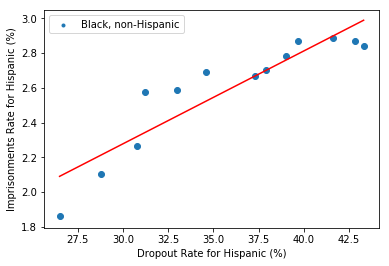

0.8326453276160103


In [43]:
plt.scatter(dropOut_df["Dropout Hispanic"], imprisonmentDf_perRace_perCapita["Hispanic"]/1000)

plt.xlabel("Dropout Rate for Hispanic (%)")
plt.ylabel("Imprisonments Rate for Hispanic (%)")
plt.legend(labels=imprisonmentDf_perRace_perCapita.columns, loc="best", markerscale=.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(dropOut_df["Dropout Hispanic"], imprisonmentDf_perRace_perCapita["Hispanic"]/1000)
plt.plot(dropOut_df["Dropout Hispanic"], intercept + slope*dropOut_df["Dropout Hispanic"], 'r', label='fitted line')
plt.show()
print(r_value**2)